# Problem Tanımı

Veri Seti:Veri seti Kaggle'dan alınmış olup adı 'UCI Heart Disease Data'dır. Dosya zip dosyası olarak indirilmiş ve içinden heart.csv dosyası seçilerek işlemlere başlanmıştır.

Problemin Amacı:

Bir bireyin yaşı, cinsiyeti,göğüs ağrısı tipi, dinlenme halindeki kan basıncı (sistolik değer, mmHg cinsinden), serum kolestrol seviyesi (mg/dL), açlık kan şekeri (1: >120 mg/dl, 0: <=120 mg/dl), egzersiz sırasında ulaştığı maksimum kalp atış hızı,	egzersize bağlı ST segment değişimi (kalp grafiği sonucu - EKG) gibi kriterlere göre kalp hastalığı riski taşıyıp taşımadığını tahmin etmek amaçtır.

Hedef Değişken: Heart Disease

1 → Kalp hastalığı var

0 → Kalp hastalığı yok

Pratikteki Önemi:
Kalp hastalıkları erken fark edilirse, oluşabilecek kötü sonuçlar engellenebilir. Model, kalp krizi risk taşıyan kişileri önceden tahmin ederek yardımcı olabilir.




# Veri Analizi ve Görselleştirme (EDA)
df.info(), df.describe() ÇIKTILARI

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("heart.csv")

df.info()

Saving heart.csv to heart (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


| Sütun Adı         | Veri Sayısı | Veri Tipi | Açıklama                                 |
|-------------------|-------------|-----------|------------------------------------------|
| Age               | 918         | int64     | Yaş (tam sayı)                           |
| Sex               | 918         | object    | Cinsiyet ("M" veya "F" gibi)             |
| ChestPainType     | 918         | object    | Göğüs ağrısı tipi (kategorik veri)       |
| RestingBP         | 918         | int64     | Dinlenme kan basıncı                     |
| Cholesterol       | 918         | int64     | Kolesterol seviyesi                      |
| FastingBS         | 918         | int64     | Açlık kan şekeri > 120 mg/dl (0 veya 1)  |
| RestingECG        | 918         | object    | EKG sonucu                               |
| MaxHR             | 918         | int64     | Maksimum kalp atış hızı                  |
| ExerciseAngina    | 918         | object    | Egzersize bağlı anjina ("Y" veya "N")    |
| Oldpeak           | 918         | float64   | ST segmenti depresyonu                   |
| ST_Slope          | 918         | object    | ST segmentinin eğimi                     |
| HeartDisease      | 918         | int64     | Kalp hastalığı var mı? (0 = Yok, 1 = Var)|


In [ ]:
df.head() #sayısal mı kategorik mi olduğunu kontrolü yapıldı

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000




İstatistik | Anlamı
-----------|--------
count      | Kaç veri var? Hepsinde 918 gözlem var (eksik veri yok).
mean       | Ortalama değer.
std        | Standart sapma (verilerin ne kadar yayıldığı).
min        | En küçük değer.
25%        | Verinin %25’i bu değerden küçük. (1. çeyrek)
50%        | Medyan: Ortanca değer.
75%        | Verinin %75’i bu değerden küçük. (3. çeyrek)
max        | En büyük değer.

Her Değişkenin Kendi Yorumu:

Age (Yaş)
- Ortalama: 53.5 yaş
- En genç: 28, en yaşlı: 77
- Yaşlar dengeli dağılmış, çoğunluk 47–60 arası.

RestingBP (Dinlenme Kan Basıncı)
- Ortalama: 132 mm Hg (normal sınırın biraz üzerinde)
- Minimum değer 0 → veri hatası olabilir.
- Genelde 120–140 arasında.

Cholesterol (Kolesterol)
- Ortalama: 198 mg/dl
- Minimum değer 0 → veri hatası olabilir.
- En yüksek: 603 mg/dl → çok yüksek!
- Medyan: 223 mg/dl (normalden biraz yüksek)

FastingBS (Açlık Kan Şekeri >120)
- Ortalama: 0.23 → Verilerin %23'ünde açlık kan şekeri yüksek.
- Kategorik gibi: 0 veya 1.

MaxHR (Maksimum Kalp Atım Hızı)
- Ortalama: 136 bpm
- En düşük: 60, en yüksek: 202
- Medyan: 138 → ortalama ile uyumlu.

Oldpeak (ST Segmenti Depresyonu)
- Ortalama: 0.88
- 0 olanlar çoğunlukta, ama bazıları 6.2 → ciddi olabilir.
- Medyan: 0.6

HeartDisease (Kalp Hastalığı)
- Ortalama: 0.55 → Yani %55’inde kalp hastalığı var.
- Kategorik: 0 = yok, 1 = var.






EKSİK VERİ KONTROLÜ

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Eksik veri olmadığı için devam edilmiştir, eğer eksik veri çok az olsaydı yani veri kaybına sebep vermeseydi df.dropna() ile eksik verilere silme işlemi yapılabilirdi; diğer durumda ise fillna komutu ile doldurma yapılırdı, bu doldurma türü farklı durumlarda değişiklik gösterir aşağıdaki tablo sayesinde duruma göre seçim yapılabilir.


1. Verinin Türü: Sayısal mı, Kategorik mi?

**Sayısal Veriler İçin:**

| Durum                                    | Önerilen Yöntem                |
|-----------------------------------------|--------------------------------|
| Veri normal dağılıma yakınsa            | Ortalama (mean) ile doldur    |
| Aykırı değer çoksa, çarpık dağılım varsa| Medyan (median) ile doldur     |
| Az sayıda eksik varsa                   | Lineer interpolasyon kullan    |
| Gelişmiş modelleme yapılacaksa          | Regresyonla tahmin ederek doldur |

**Kategorik Veriler İçin:**

| Durum                                    | Önerilen Yöntem                        |
|-----------------------------------------|----------------------------------------|
| Sınıf sayısı azsa ve biri baskınsa      | Mod (en sık geçen değer) ile doldur    |
| Bilgi kaybı kabul edilebilirse          | "Bilinmiyor" gibi özel bir değer ile doldur |
| Gelişmiş analiz yapılacaksa             | Sınıflandırma modeliyle tahmin et      |

---

 2. Eksik Verinin Oranı Ne Kadar?

| Eksik Oranı       | Önerilen İşlem                             |
|-------------------|--------------------------------------------|
| %5’ten az         | Silmek mantıklı olabilir                   |
| %5 – %30 arası    | Doldurmak daha doğru                       |
| %30’dan fazla     | Sütunu çıkarmak veya dikkatle doldurmak    |

---

Örnek doldurma kodları:

df["age"] = df["age"].fillna(df["age"].mean())            # Ortalama ile

df["sex"] = df["sex"].fillna(df["sex"].median())       # Medyan ile

cdf['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # Mod ile


NOt: Bu doldurma işlemleri geçicidir, kalıcı olarak değişim için inplace=True da kodlara eklenmelidir.

HEDEF DEĞİŞKENİN (Heart Disease) DAĞILIMI

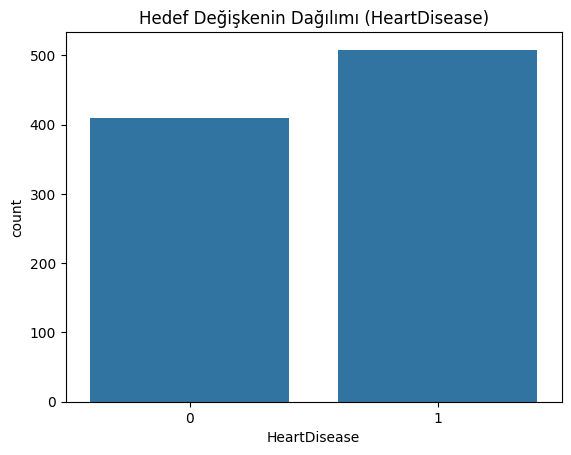

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='HeartDisease')
plt.title('Hedef Değişkenin Dağılımı (HeartDisease)')
plt.show()


Hedef değişken olan HeartDisease, ikili (binary) bir kategorik değişkendir.
Değerleri sadece 0 ve 1 olduğu için bu değişkenin dağılımını göstermek amacıyla bar chart (çubuk grafik) tercih edilmiştir.

HeartDisease bir sınıflandırma problemi olduğundan her sınıfın (0 ve 1) kaç örneği olduğunu net şekilde göstermek için countplot() kullanılmıştır.


KORELASYONLAR,DAĞILIMLAR VEYA KATEGORİK ETKİLEŞİMLER

Korelasyon Matrisi

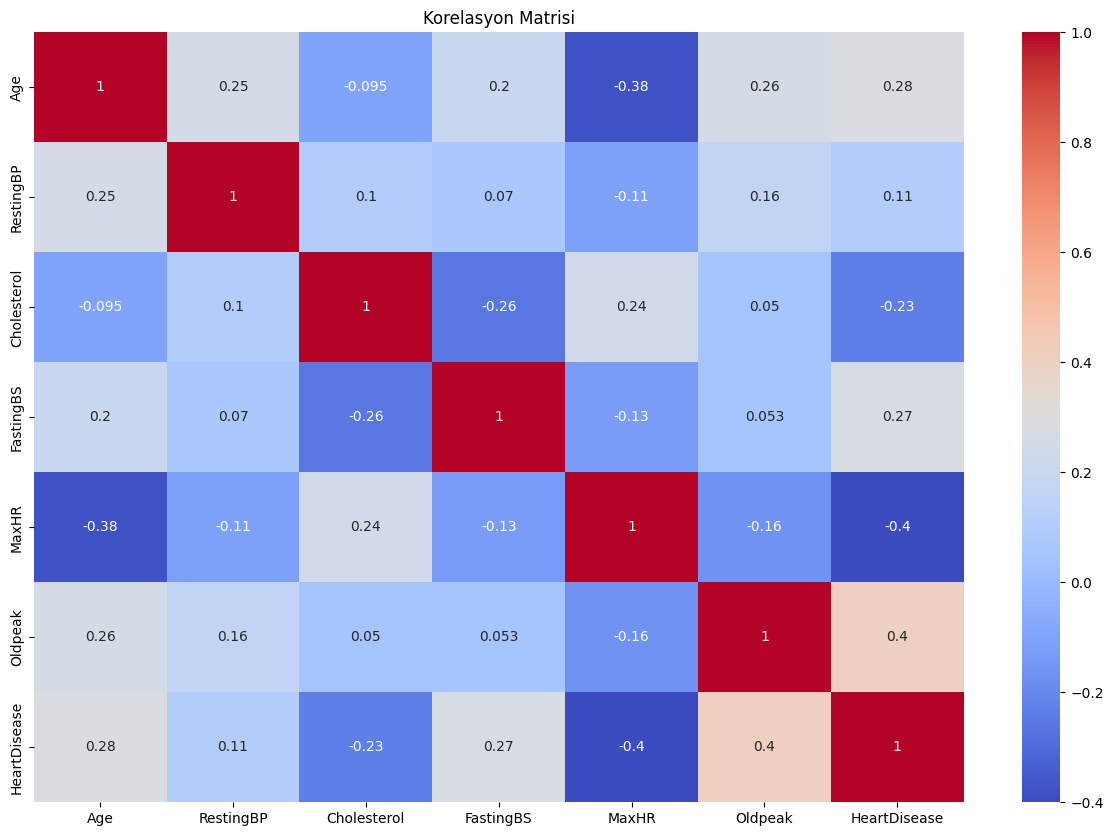

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = df.copy()

corr = df_encoded.corr(numeric_only=True)  # Kategorik veriler ile korelasyon matrisi yapılamayacağı için sadece sayısal sütunları seçtik

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

Korelasyon matrisi sonucuna göre, Oldpeak değişkeni ile kalp hastalığı arasında en güçlü pozitif ilişki görülmektedir. Bu, ST segment depresyonu arttıkça kalp hastalığı riskinin de arttığını gösterir. MaxHR (maksimum kalp atış hızı) ise kalp hastalığıyla negatif korelasyona sahiptir; yani kalp atış hızı yüksek olan bireylerde kalp hastalığı riski daha düşüktür. Age ve RestingBP gibi değişkenler ise kalp hastalığıyla zayıf pozitif ilişkiler gösterir. Cholesterol değişkeninin korelasyonu çok düşüktür, bu da model açısından belirleyici olmadığını gösterebilir.

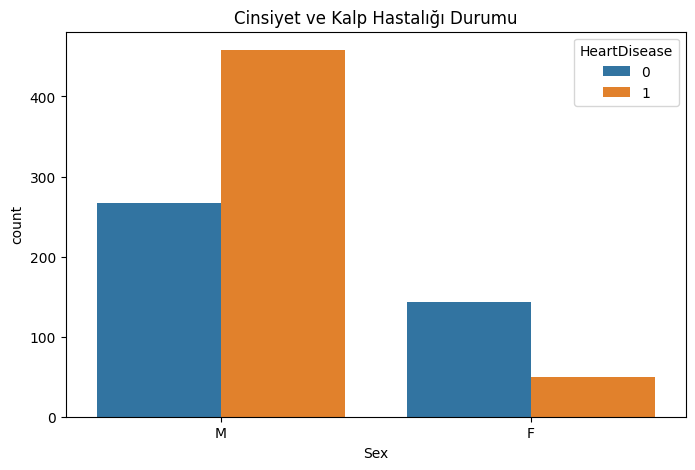

In [ ]:
#Kategorik Değişken ve Hedef Değişken Karşılaştırılması (Cinsiyet vs Kalp Hastalığı)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='HeartDisease') #kategorik verilerin frekansını yani sıklığını ölçeriz
plt.title("Cinsiyet ve Kalp Hastalığı Durumu")
plt.show()

Erkek bireylerde (M: Male) kalp hastalığı görülme oranı kadınlara (F: Female) kıyasla daha fazladır. Bu durum, veri setine göre erkek cinsiyetinin kalp hastalığı için daha riskli bir grup olabileceğini gösteriyor.

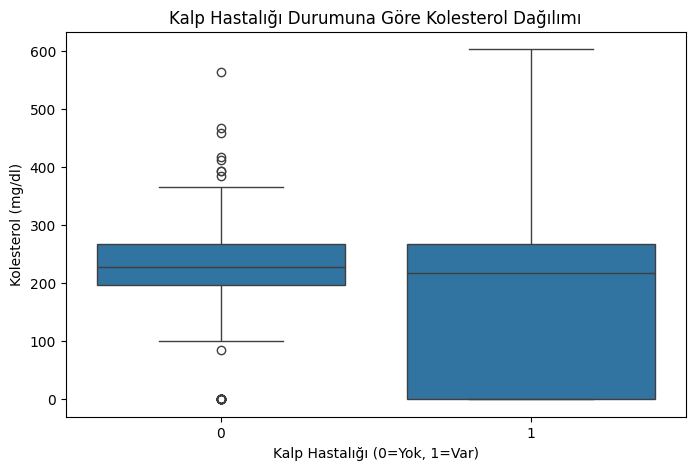

In [ ]:
#Sayısal Değişken ve Hedef Değişken Karşılaştırılması (Kolesterol vs Kalp Hastalığı)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')
plt.title("Kalp Hastalığı Durumuna Göre Kolesterol Dağılımı")
plt.xlabel("Kalp Hastalığı (0=Yok, 1=Var)")
plt.ylabel("Kolesterol (mg/dl)")
plt.show()

Grafikte görüldüğü üzere, kalp hastalığı olan bireylerin (HeartDisease = 1) kolesterol seviyeleri genellikle daha yüksek ve daha geniş bir dağılıma sahiptir.

Medyan kolesterol değerleri hastalığı olan grupta biraz daha yüksek görünmektedir.

Boxplot analizinde ilginç bir şekilde, kalp hastalığı olmayan grupta daha fazla uç değer gözlemlendi. Bu durum, yüksek kolesterol seviyelerinin tek başına kalp hastalığı belirtisi olmadığını, diğer faktörlerin de önemli olduğunu düşündürmektedir. Ayrıca bu gruptaki bireylerde hastalık gelişmemiş olsa da, risk faktörlerinin var olabileceğini göstermektedir.

# Veri Ön İşleme

In [ ]:
# Aykırı değer analizi için IQR yöntemi

Q1 = df["Cholesterol"].quantile(0.25)
Q3 = df["Cholesterol"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler

outliers_iqr = df[(df["Cholesterol"] < lower_bound) | (df["Cholesterol"] > upper_bound)]
print(outliers_iqr)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N  

Aykırı değerleri belirlerken IQR yöntemi, verinin dağılımına duyarlı, sağlam (robust) bir yaklaşımdır. Ortalamaya ve standart sapmaya dayalı yöntemler (örneğin Z-Skoru) verinin simetrik ve normal dağılmış olmasını varsayar. Ancak çoğu gerçek veri setinde bu varsayım geçerli değildir.

IQR, çeyrek değerler (Q1 ve Q3) üzerinden çalıştığı için özellikle çarpık dağılım gösteren değişkenlerde daha güvenilir sonuçlar verir. Aykırı değerleri silmek yerine, sınırlarla kırparak (Winsorizing) modelin doğruluğunu korurken veriden kopmadan ilerlemeyi sağlar.

Bu sebeple, hem veri kaybını önlemek hem de sağlam bir ön işleme sağlamak amacıyla IQR yöntemini tercih edilmiştir.

In [ ]:
# Winsorizing (üst ve alt sınır dışındakileri sınır değerle değiştirme)

df["Cholesterol"] = df["Cholesterol"].clip(lower_bound, upper_bound)

In [ ]:
# ikili kategorik veriler için label encoding işlemi

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])  # M-F → 1-0

le_angina = LabelEncoder()
df["ExerciseAngina"] = le_angina.fit_transform(df["ExerciseAngina"])  # Y-N → 1-0

Makine öğrenmesi modelleri sayısal verilerle çalışır.

İkili (binary) kategoriler basitçe 0 ve 1 ile temsil edilerek modele uygun hale getirilmiştir.

Bu işleme Label Encoding denir ve iki kategorili veriler için uygundur.

In [ ]:
#Çoklu kategorik veriler için one-hot encoding işlemi

df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True)

ChestPainType, RestingECG veST_Slope sütunları birden fazla sınıf içerdiği için One-Hot Encoding kullanılmmıştır.

Her kategori için ayrı sütunlar oluşturularak 0/1 değerleriyle temsil edilmiştir.

drop_first=True diyerek dummy trap (çoklu doğrusal bağlantı) önlenmiştir.

NOT: RestingECG (dinlenme elektrokardiyogram sonuçları):
"Normal", "ST", "LVH" yani 3 farklı kategoriden oluşmuştur

ST_Slope (egzersiz sonrası ST segment eğimi):
"Up", "Flat", "Down" yani 3 farklı kategoriden oluşmuştur.

In [ ]:
#Test aşaması

from sklearn.model_selection import train_test_split

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


"HeartDisease" hedef değişkendir (yani tahmin etmek istediğimiz şey).

Diğer tüm sütunlar özellik (feature) olarak kullanılmıştır.

Modelin performansını test edebilmek için veri %80 eğitim, %20 test olarak bölünmüştür.


In [ ]:
# Ölçekleme aşaması

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sayisal_ozellikler = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Sadece eğitim verisine fit, test verisine transform (veri sızıntısı olmaması için)

X_train[sayisal_ozellikler] = scaler.fit_transform(X_train[sayisal_ozellikler])
X_test[sayisal_ozellikler] = scaler.transform(X_test[sayisal_ozellikler])

Sayısal sütunların farklı birimlerde olması modelin dengesini bozar (örneğin yaş 40, kolesterol 300).

Bu yüzden StandardScaler ile tüm sayısal özellikler ortalamaları 0, standart sapmaları 1 olacak şekilde ölçeklendirilmiştir.

Fit işlemi sadece eğitim setinde, transform işlemi ise hem eğitim hem test setinde uygulanmıştır (bilgi sızıntısı olmaması için).



Ölçekleme işlemi, mutlaka eğitim-test ayrımından sonra uygulanmalıdır!Test verisi, modelin hiç “görmediği” bir veri olmalıdır. Eğer tüm veri setinde fit() uygulanırsa, test verisinin ortalaması ve std’si modele sızar → doğrulama güvenilir olmaz!

# Sınıflandırma Modelleri

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Model oluşturma ve eğitme

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Tahminler

y_pred_log = log_model.predict(X_test)

# Başarı metrikleri

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression
Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028
F1 Score: 0.8695652173913043


Lojistik regresyon modeli ile yapılan tahminlerde doğruluk (accuracy) oranı, modelin test verisindeki örneklerin büyük çoğunluğunu doğru tahmin ettiğini göstermektedir. Precision (kesinlik) değeri yüksek çıktığı için, model kalp hastalığı var dediği bireylerin çoğunda gerçekten hastalık bulunmuştur. Recall (duyarlılık) değerine bakıldığında, modelin bazı gerçek hastaları kaçırdığı, yani hepsini tam olarak tespit edemediği anlaşılmaktadır. F1 skoru ise precision ve recall arasında dengeli bir performans ortaya koyduğunu gösterir. Genel olarak modelin başarılı, ancak gerçek hastaları kaçırma riski taşıdığı söylenebilir.

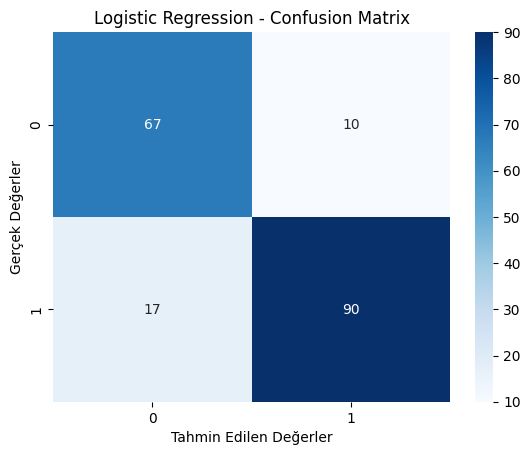

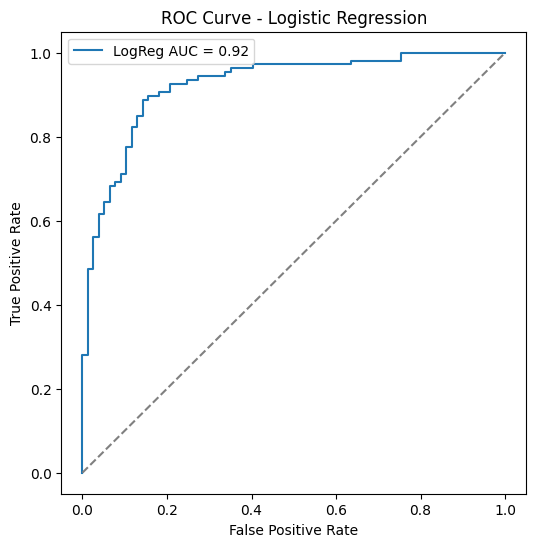

In [ ]:
# Confusion Matrix

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.show()

# ROC Curve

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, label='LogReg AUC = %0.2f' % roc_auc_log)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model oluşturma ve eğitme

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler

y_pred_rf = rf_model.predict(X_test)

# Başarı metrikleri

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8586956521739131
Precision: 0.8857142857142857
Recall: 0.8691588785046729
F1 Score: 0.8773584905660378


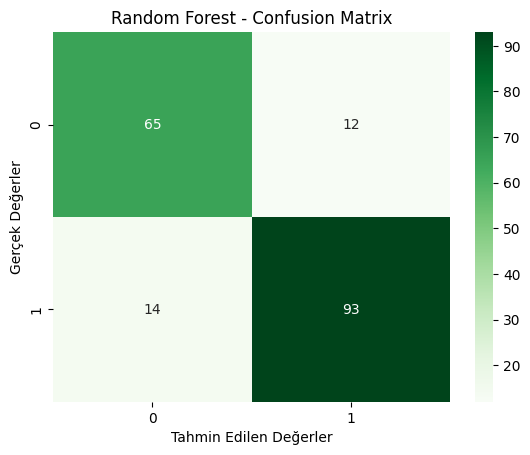

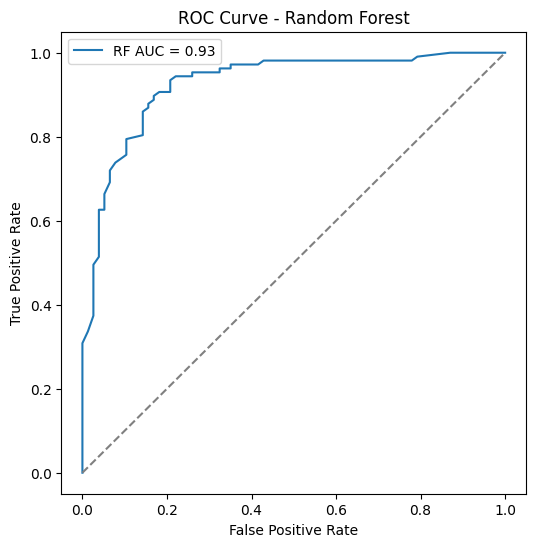

In [ ]:
# Confusion Matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.show()

# ROC Curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, label='RF AUC = %0.2f' % roc_auc_rf)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

Karmaşıklık matrisi, modelin tahminlerinin ne kadar doğru olduğunu detaylı olarak gösterir:

Gerçek pozitif: Modelin doğru şekilde “hasta” dediği kişi sayısı.

Gerçek negatif: Modelin doğru şekilde “sağlıklı” dediği kişi sayısı.

Yanlış pozitif (False Positive): Modelin sağlıklı kişiye “hasta” demesi.

Yanlış negatif (False Negative): Modelin hasta kişiye “sağlıklı” demesi.

Eğer matrisin diyagonalinde (sol üst ve sağ alt) değerler yüksekse, modelin doğru tahminleri fazladır. Sağ alt köşedeki sayı (false negatives) yüksekse, model bazı hastaları atlıyor demektir, bu sağlık alanında ciddi bir risktir.
Buna göre modelimiz başarılı bir tahmin yapmıştır.

ROC eğrisi ile modelin pozitif sınıfı ne kadar iyi ayırdığını gösterilmiştir.

ROC eğrisinin altındaki alan (AUC) 1’e ne kadar yakınsa, o kadar iyidir.

AUC skoru 0.80 ve üzeriyse, model oldukça iyi sınıflandırma yapıyor denebilir.
